In [ ]:
%run imports.ipynb
%run information_conditions.ipynb import Information_Conditions
%run base_ecopg.ipynb import BaseEcologicalPublicGood%run base_ecopg.ipynb
%run base_ecopg.ipynb import all_information_modes
%run helper_functions.ipynb import *
%run simulation_and_results_functions.ipynb import *

In [7]:
ecopg = BaseEcologicalPublicGood()
ecopg_for_random_pts = Information_Conditions(ecopg, mode='both_state_and_action_information')
mae = POstratAC(env= ecopg_for_random_pts, learning_rates=0.1, discount_factors=0.9)
mae.random_softmax_strategy()
X_random_list = [mae.random_softmax_strategy() for _ in range(3)]
#Just to initialise a random startegy for the state set. This will be used to get the average policy for the given observation set



d:\Program_Files_D\Python\Lib\site-packages\matplotlib\quiver.py:695: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
d:\Program_Files_D\Python\Lib\site-packages\matplotlib\quiver.py:695: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


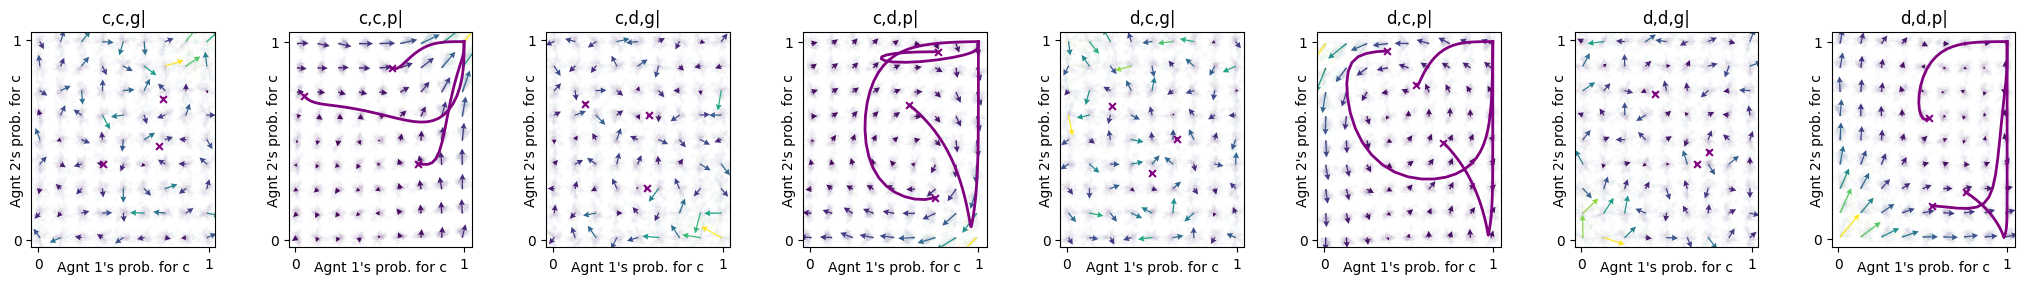

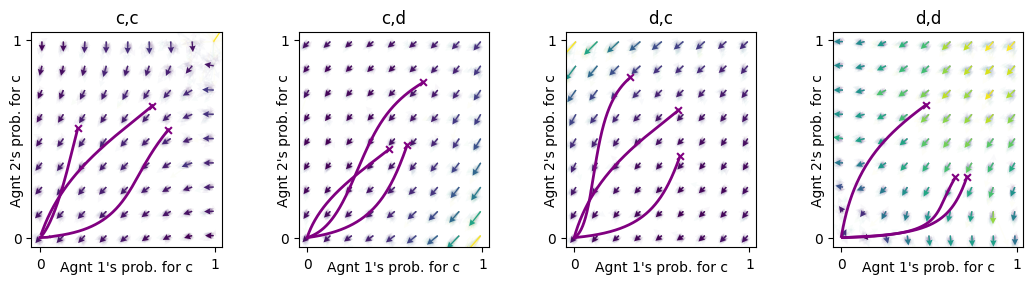

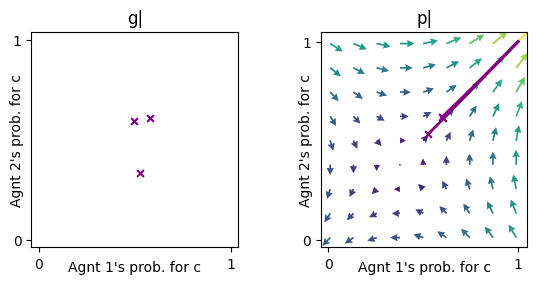

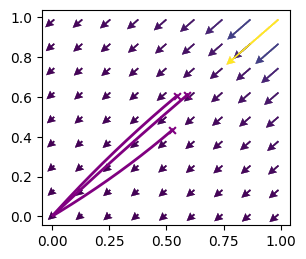

In [17]:
#| export

for mode in ['both_state_and_action_information','only_action_history_information', 'only_state_information','no_information', ]:
    #for each information condition get the average policy for the given observation set and plot the flow diagram

    
    information_condition_instance = Information_Conditions(ecopg, mode=mode)
    num_observed_states = len(information_condition_instance.Oset[0])
    x, y = ([0], list(range(num_observed_states)), [0]), ([1], list(range(num_observed_states)), [0])
    mae1 = POstratAC_eps(env=information_condition_instance, learning_rates=0.1, discount_factors=0.98)

    ax = fp.plot_strategy_flow(
        mae1,
        x, y, flowarrow_points=np.linspace(0.01, 0.99, 9), NrRandom=32,
        conds=np.array(information_condition_instance.Oset)[0, :num_observed_states],
        # col = 'blac'
    )

    for X_for_state_set in X_random_list:
        X_for_observation_set = average_policy_for_given_observation_set(X_for_state_set, information_condition_instance.O)
        xtraj, fixedpointreached = mae1.trajectory(X_for_observation_set, Tmax=10000, tolerance=1e-5)

        fp.plot_trajectories([xtraj], x, y, cols=['purple'], axes = ax)



